# INM427 Neural Computing Coursework
### Arshad Ahmed and Konstantinos Stathoulopoulos
#### MSc Data Science 2015/16
![Nerural Network Image](https://images.duckduckgo.com/iu/?u=http%3A%2F%2Fmedia-cache-ak0.pinimg.com%2Foriginals%2F34%2F67%2F5d%2F34675d976e9fb86f9920a26a6016bea1.jpg&f=1)

# Contents

## 1: Introduction
    + Aims
    + Description of dataset
    + Methods to be used
    
## 2: Data Processing
    + Data Import
    + Preprocessing
    + Visualisation
    + Basic statistics
    + Observations
    
## 3: Modelling
    + Splitting data into training and test set
    + Application of SVM
    + Application of Multilayer Perceptron
    + Results
    
## 4: Further Testing
    + Additional training and testing of models
    + Observations

# 1: Introduction

***
### Aim

Our aim is to test the accuracy of a neural network model and an SVM in classifying wines as red or white based on their chemical properties. To do this experiment we use the [Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) from the UCI Machine Learning Repository.

### Description of the dataset

>The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). 

**Source:**
>Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez 
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal 
@2009

### Attribute Information

Input variables (based on physicochemical tests): 
+ fixed acidity 
+ volatile acidity 
+ citric acid 
+ residual sugar 
+ chlorides 
+ free sulfur dioxide 
+ total sulfur dioxide 
+ density 
+ pH 
+ sulphates 
+ alcohol 
+ quality (score between 0 and 10)
+ **Color: red or white: this our target variable which we will add to the data**


# 2: Data Processing

In [4]:
#Import Libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers.core import *
from keras.optimizers import *
from keras.regularizers import *
from keras.callbacks import EarlyStopping
import sklearn
from sklearn.preprocessing import *
from sklearn.cross_validation import *
from sklearn.metrics import *
from pandas.tools.plotting import *
%matplotlib inline
import random

Using TensorFlow backend.


In [144]:
#set plotting context
sns.set(context='poster', style='white', palette='husl',font='sans-serif', font_scale=1, color_codes=False, rc=None)

In [6]:
#for reproducibility
random.seed(11111111111111111111111111111)

# Import data

In [7]:
red = pd.io.parsers.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',\
                            delimiter=';')
white = pd.io.parsers.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',\
                            delimiter=';')

In [8]:
#Add class labels
red["Color"] = 0
white["Color"] = 1

In [9]:
# check data
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Color
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0


In [10]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Color
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0


In [11]:
print('Total Samples White Wine Data: ',white.shape[0])
print('Total Samples Red Wine Data: ',red.shape[0])
print('Class Imbalance: White/Red: ',white.shape[0]/red.shape[0])

Total Samples White Wine Data:  4898
Total Samples Red Wine Data:  1599
Class Imbalance: White/Red:  3.063164477798624


Clearly we have a class imbalance between the red and white wine classes. We see that there are 3 times more white samples than red samples. It might we worth considering oversampling, undersampling and SMOTE methods. But an easier approach maybe to stack the red data 3 times so there are roughly equal in the final dataset. 

However, oversampling may cause overfitting in the model by changing the decision boundary as a result of the changed class frequencies. Therefore, we will run the data through our classifiers as they perform badly in the test set then we will have a case for exploring them. 

**References**

[SMOTE: Synthetic Minority Over-sampling Technique](https://www.cs.cmu.edu/afs/cs/project/jair/pub/volume16/chawla02a-html/chawla2002.html)

In [12]:
#check for null values
print('Null Values for Red Wine Data \n',pd.isnull(red).sum())
print('\nNull Values for White Wine Data \n',pd.isnull(white).sum())

Null Values for Red Wine Data 
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Color                   0
dtype: int64

Null Values for White Wine Data 
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Color                   0
dtype: int64


# Visualization

(array([   0.,   50.,  100.,  150.,  200.,  250.,  300.]),
 <a list of 7 Text xticklabel objects>)

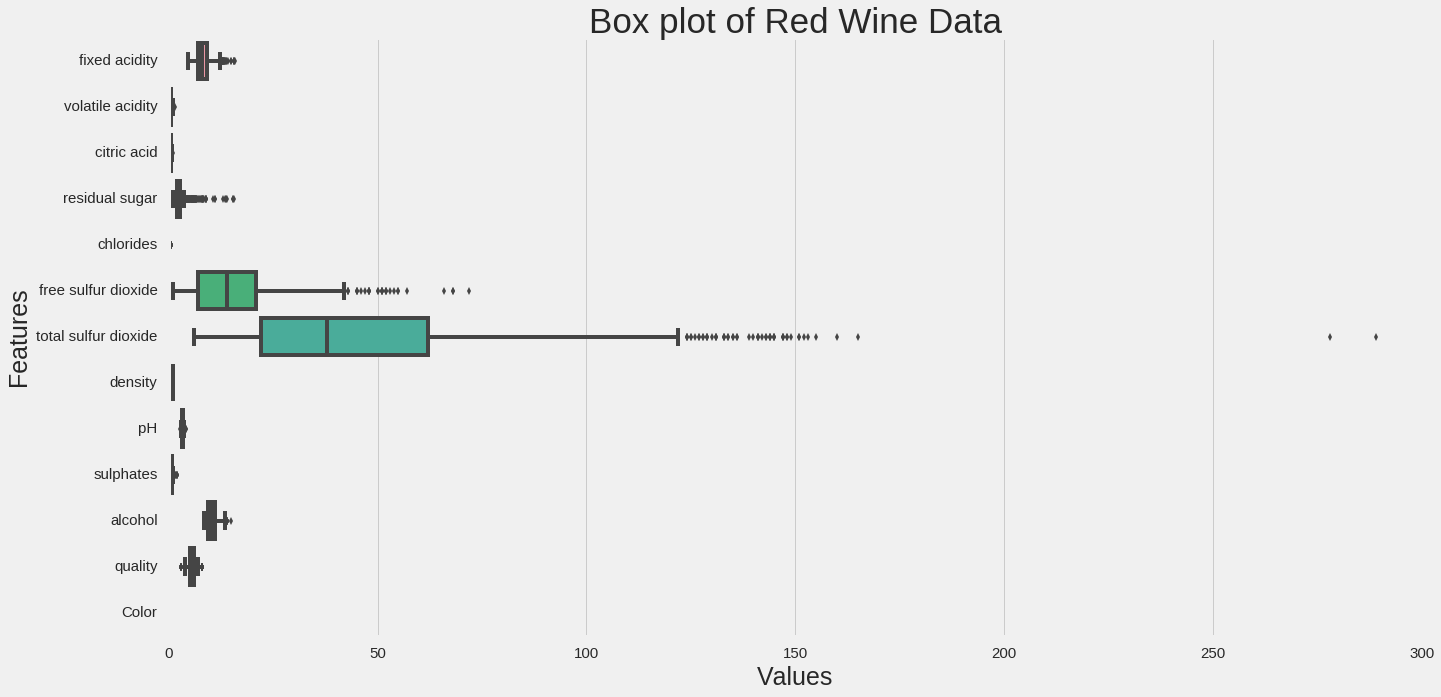

In [95]:
plt.figure(figsize=(20,10))
sns.boxplot(data=red, orient="h")
plt.title('Box plot of Red Wine Data',  fontsize = 35)
plt.ylabel('Features', fontsize=25)
plt.xlabel('Values', fontsize=25)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

(array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,  450.]),
 <a list of 10 Text xticklabel objects>)

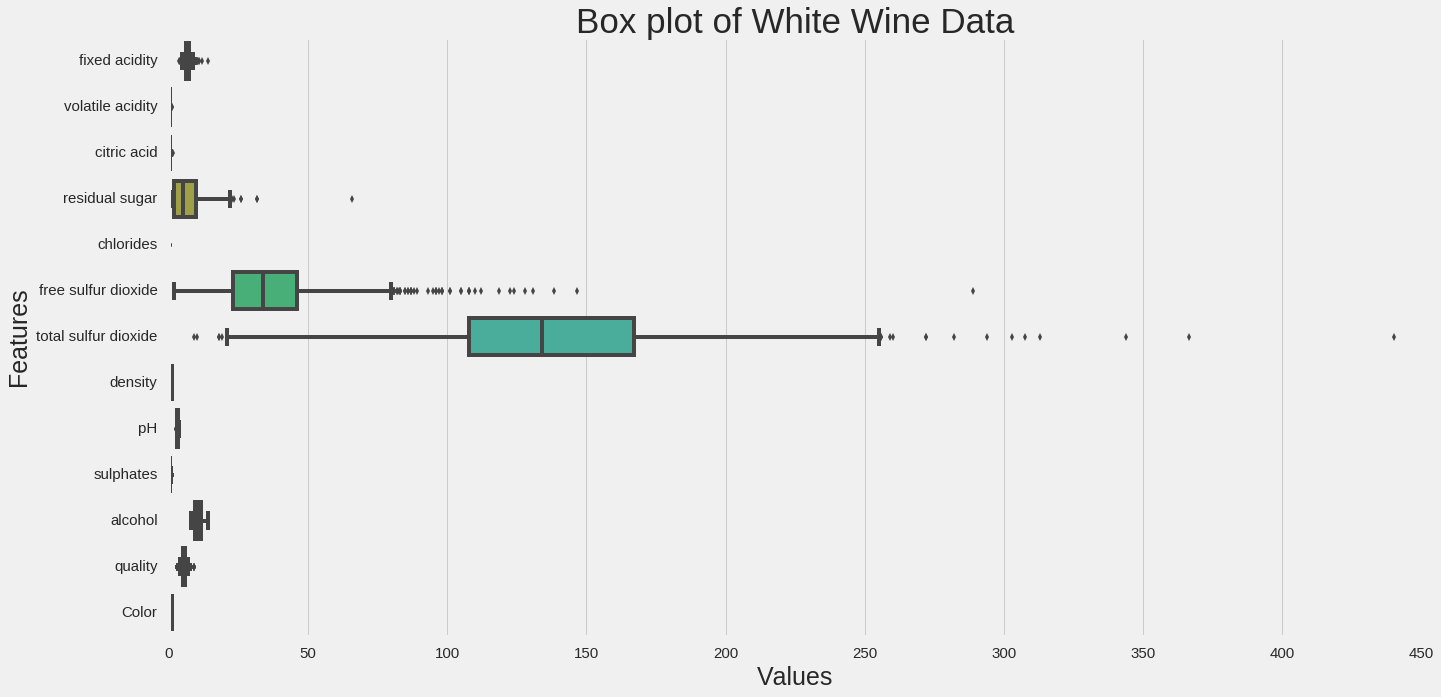

In [96]:
plt.figure(figsize=(20,10))
sns.boxplot(data=white, orient="h")
plt.title('Box plot of White Wine Data',  fontsize = 35)
plt.ylabel('Features', fontsize=25)
plt.xlabel('Values', fontsize=25)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

Clearly some outliers present for the same variables in both the datasets. Also there is a wide variety in scale suggesting that normalisation will be required. 

# Basic Statistics

In [15]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Color
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,0


In [16]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Color
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,1
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,1
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,1
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,1
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1


# Observations

So we far we can make the following observations from the data:
+ There is a notable class imbalance in the data with red wine samples being outnumbered 3 to 1 by white wine data
+ Also it can be said that within these datasets there are more liklely to be normal quality wines, than extremely bad or good ones. Although this is not as important for our purposes but it is necessary to keep in mind.
+ We see two variables, Free sulfur dioxide and Total sulfur di oxide having higher variance and mean than all other variables in both datasets. 
+ We note from the boxplots of both the datasets that there is huge variation in scale and the aforementioned variables dominate the other ones, so we need to scale the data. 
+ We also see high correlation among variables suggesting redundant variables. Thus it will be useful to perform feature learning. However since Neural Networks are universal function approximators and feature learners there is no need to supply it with a compressed representation of the data through a method such as PCA but autoencoders can be explored.

    
Given that we have identified a strong class imbalance within the data, it might we worth considering oversampling, undersampling and SMOTE methods. But an easier approach maybe to to stack the red data 3 times so there are roughly equal in the final dataset. 

However, oversampling may cause overfitting in the model by changing the decision boundary as a result of the changed class frequencies. Therefore, we will run the data through our classifiers as they perform badly in the test set then we will have a case for exploring them. 

**References**

[SMOTE: Synthetic Minority Over-sampling Technique](https://www.cs.cmu.edu/afs/cs/project/jair/pub/volume16/chawla02a-html/chawla2002.html)
    
    
    

In [17]:
#join both datasets together
data =  pd.concat([red,white])
print('Data after merging \n',data.head())
print('Total Samples: ', data.shape[0])
print('Total Columns: ', data.shape[1])

Data after merging 
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11                    34   0.9978  3.51       0.56   
1                   25                    67   0.9968  3.20       0.68   
2                   15                    54   0.9970  3.26       0.65   
3                   17                    60   0.9980  3.16       0.58   
4                   11                    34   0.9978  3.51       0.56   

   alcohol  quality  Color  
0      9.4        5      0  
1      

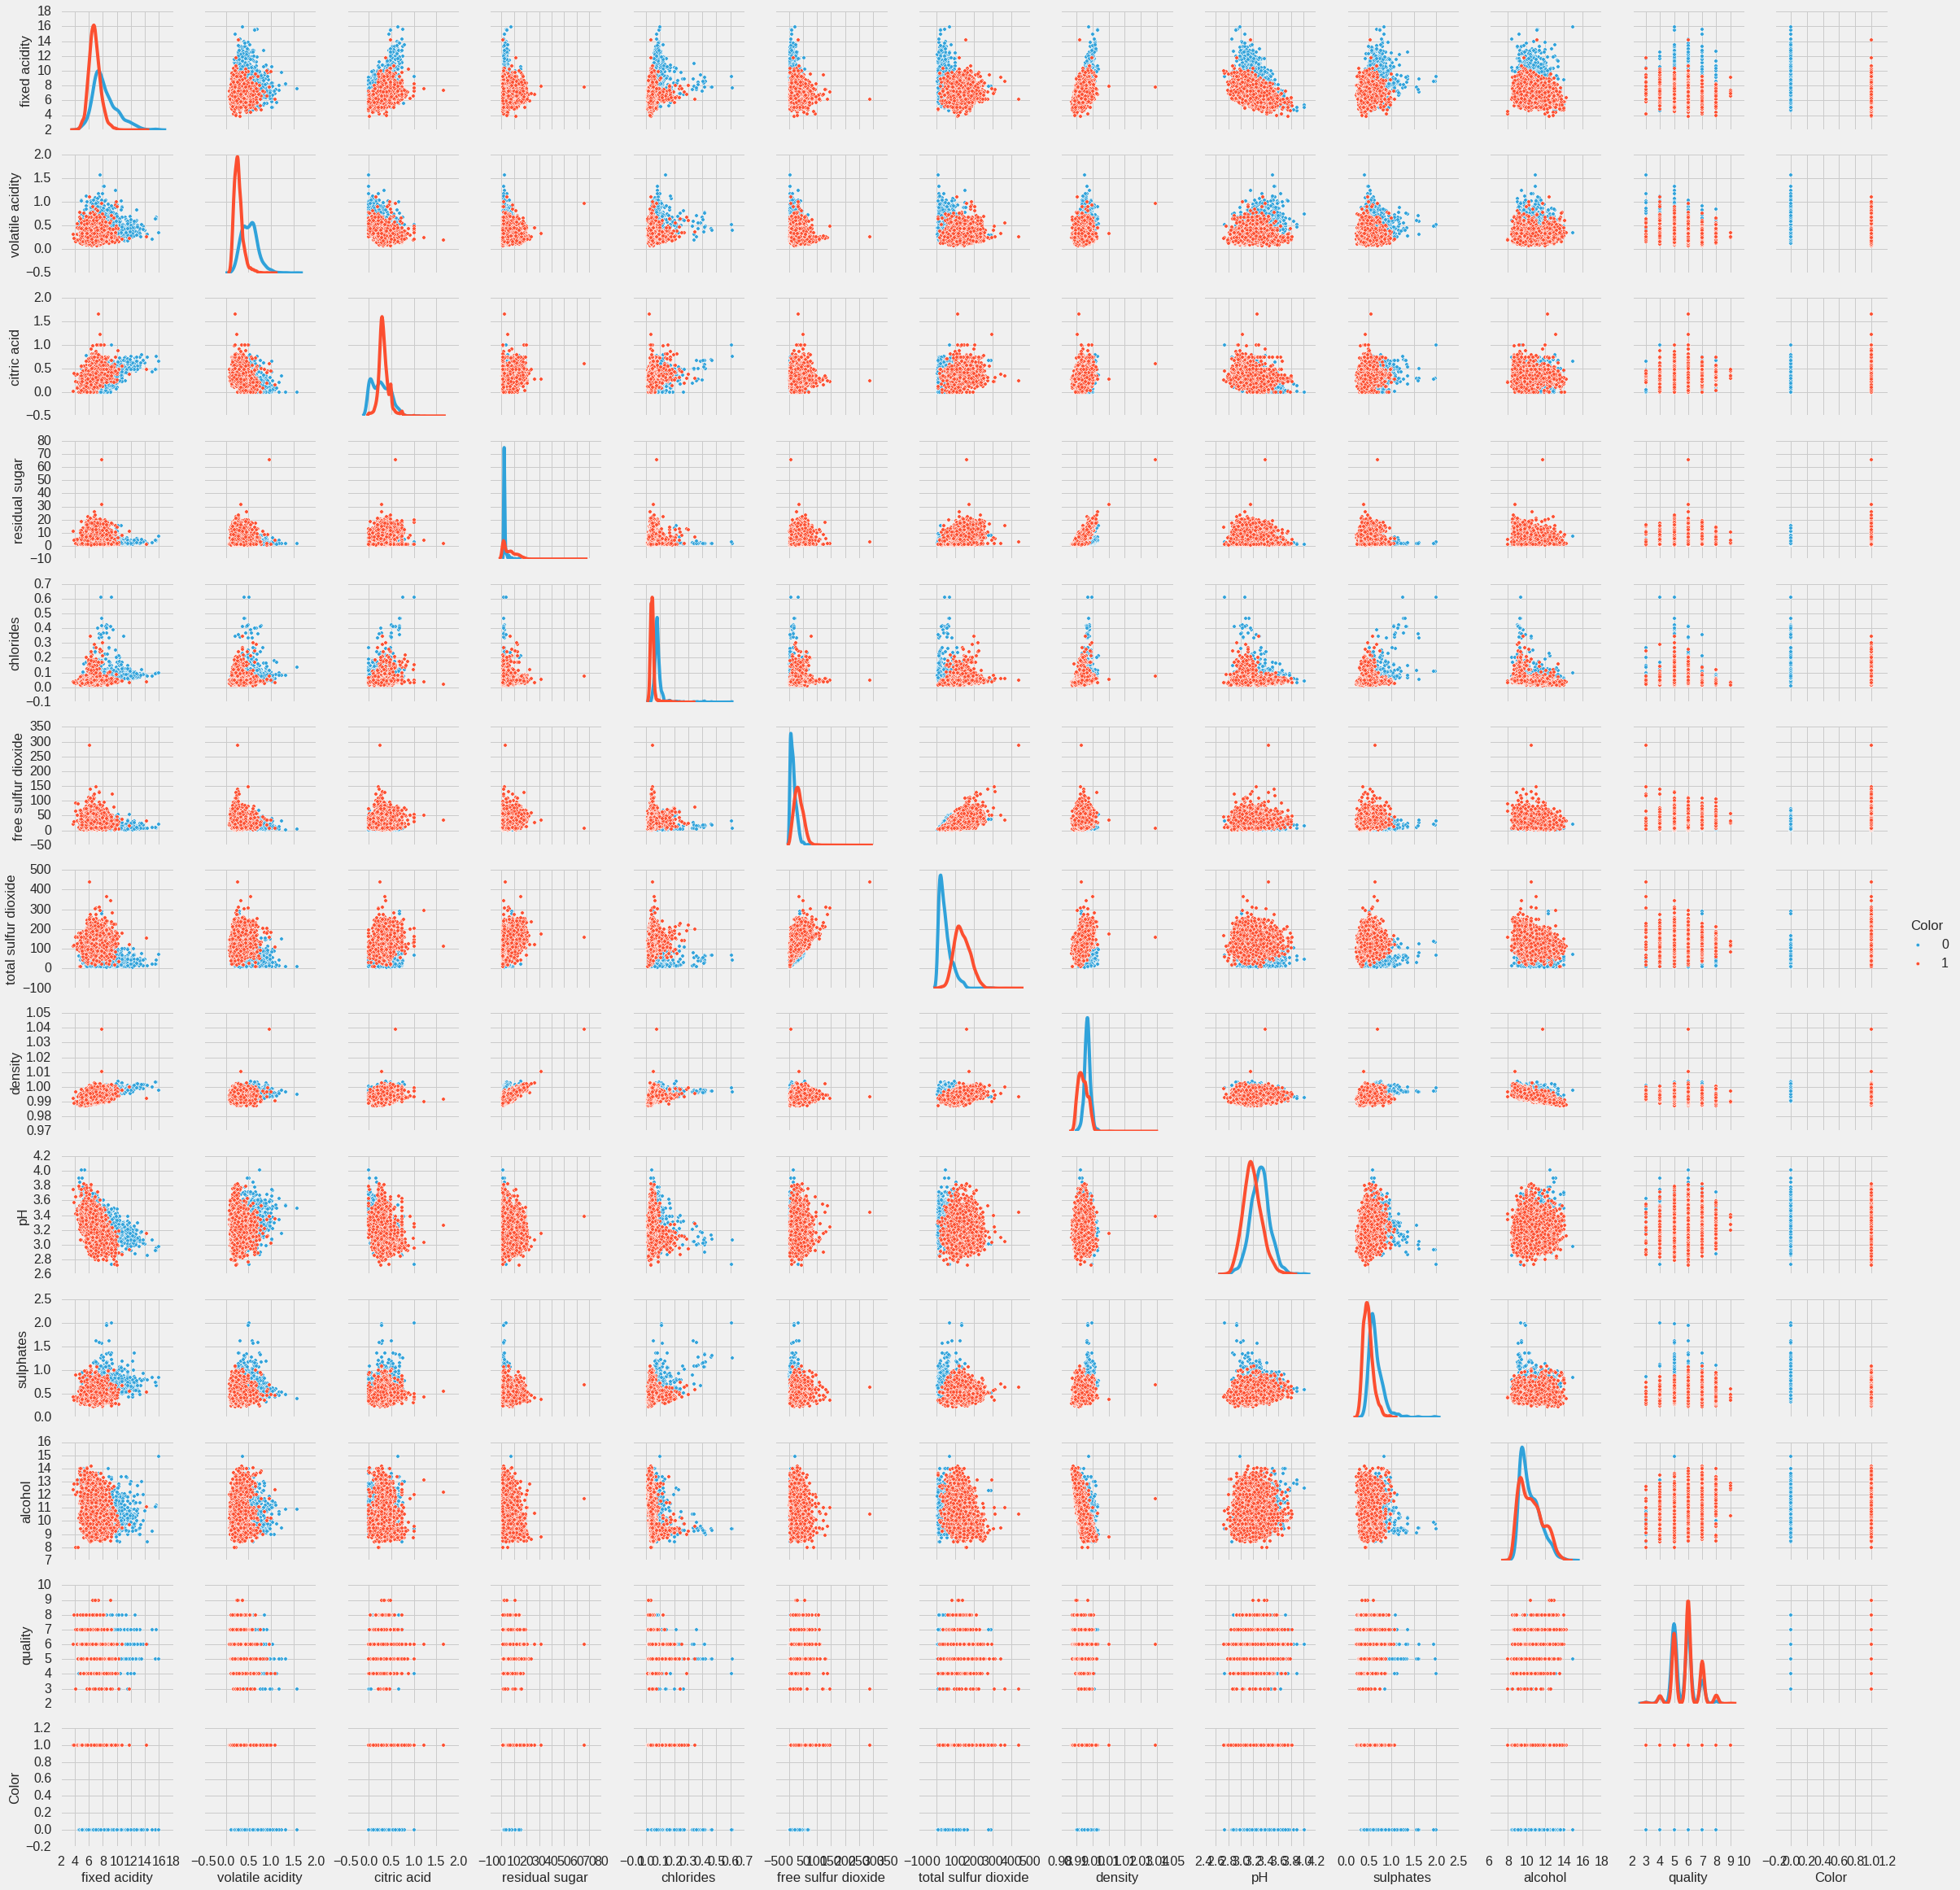

In [97]:
plt.figure(figsize=(30,20))
sns.pairplot(data,diag_kind='kde',hue='Color')

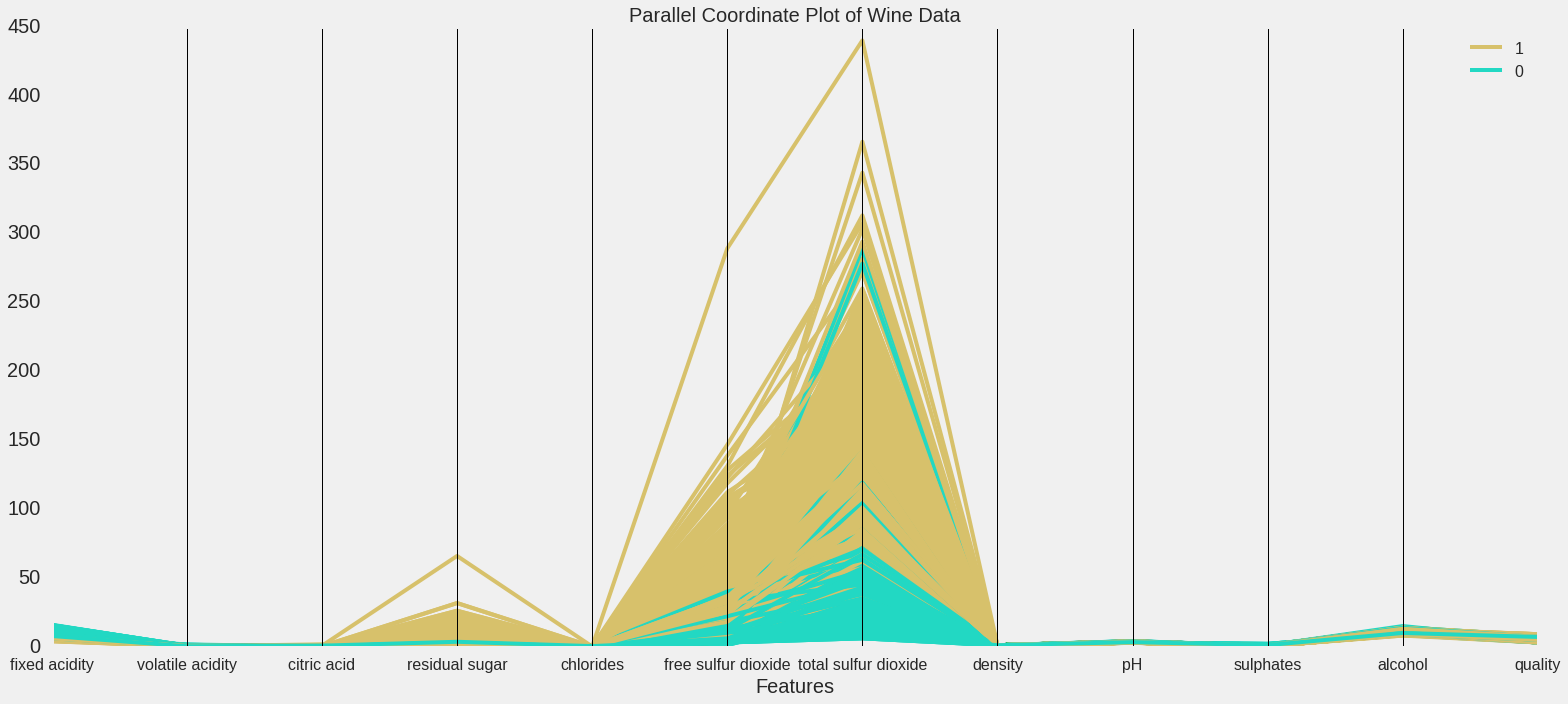

In [98]:
plt.figure(figsize=(22,10))
parallel_coordinates(data,'Color')
plt.xlabel('Features', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=20)
plt.title('Parallel Coordinate Plot of Wine Data', fontsize=20)
plt.tight_layout()

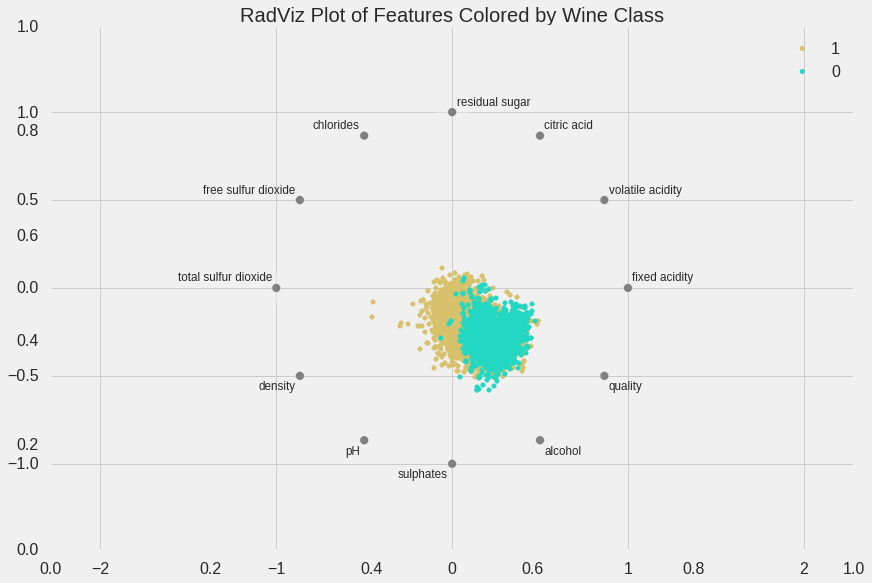

In [99]:
#Details here http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-radviz
plt.title('RadViz Plot of Features Colored by Wine Class')
radviz(data,'Color')
plt.tight_layout()

In [21]:
#Shuffle df
data = data.iloc[np.random.permutation(len(data))]

In [22]:
#Reset index 
data.reset_index(level = 0, inplace = True)

In [23]:
#Drop old index (not needed column)
data = data.drop('index', axis = 1)

In [29]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Color
0,6.5,0.23,0.20,7.5,0.050,44,179,0.99504,3.18,0.48,9.533333,5,1
1,6.2,0.35,0.29,7.3,0.044,56,244,0.99560,3.36,0.55,10.000000,6,1
2,6.7,0.34,0.26,1.9,0.038,58,138,0.98930,3.00,0.47,12.200000,7,1
3,6.4,0.17,0.27,6.7,0.036,88,223,0.99480,3.28,0.35,10.200000,6,1
4,7.1,0.20,0.30,0.9,0.019,4,28,0.98931,3.20,0.36,12.000000,6,1


# 3: Modelling

** Split data into features and targets **

In [30]:
colnames = list(red.columns.values)
colnames

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'Color']

In [31]:
feat = data[colnames[:-1]]
feat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.5,0.23,0.20,7.5,0.050,44,179,0.99504,3.18,0.48,9.533333,5
1,6.2,0.35,0.29,7.3,0.044,56,244,0.99560,3.36,0.55,10.000000,6
2,6.7,0.34,0.26,1.9,0.038,58,138,0.98930,3.00,0.47,12.200000,7
3,6.4,0.17,0.27,6.7,0.036,88,223,0.99480,3.28,0.35,10.200000,6
4,7.1,0.20,0.30,0.9,0.019,4,28,0.98931,3.20,0.36,12.000000,6


In [32]:
target = data[colnames[12]]
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Color, dtype: int64

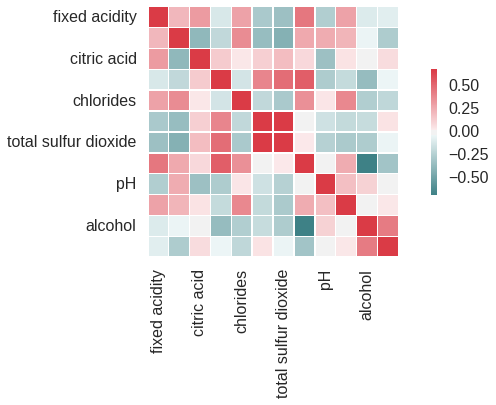

In [33]:
#Plot diagonal correlation matrix.
corrmap = feat.corr()
# Set up the matplotlib figure
ff, axarr = plt.subplots(figsize=(10, 6))
# Generate colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)
# Draw the heatmap 
sns.heatmap(corrmap, cmap=cmap, vmax=.3, square=True, 
            xticklabels=2, yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=axarr)
plt.tight_layout()

In [34]:
#Firstly, we will spot 1D outliers
#The observations which are outside this range, will be outliers
def outliers(x):     
    if x < (q1 -1.5 * IQR) or x > (q3 + 1.5 * IQR):
        return 1
    else:
        return 0  

In [35]:
#This function has a nested function (the above one) and will spot the outlier and put them in another dataframe
df_outlier = pd.DataFrame() # create an empty Dataframe
column_names = np.asarray(feat.columns.values) 
for i in column_names:
    q3, q1 = np.percentile(feat[i], [75, 25])
    IQR = q3 - q1
    df_outlier[i] = feat[i].apply(outliers)

In [36]:
#The sum of 1D outliers of each attribute
df_outlier.sum()

fixed acidity           357
volatile acidity        377
citric acid             509
residual sugar          118
chlorides               286
free sulfur dioxide      62
total sulfur dioxide     10
density                   3
pH                       73
sulphates               191
alcohol                   3
quality                 228
dtype: int64

**Scale data to [0,1] interval**

We see below that this scaling works well and enables us to see the variables that were previously dominated by the sulfur variables.

In [37]:
#normalise features to 0,1
from sklearn.preprocessing import MinMaxScaler
feat_scaled = MinMaxScaler().fit_transform(feat)

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 <a list of 8 Text xticklabel objects>)

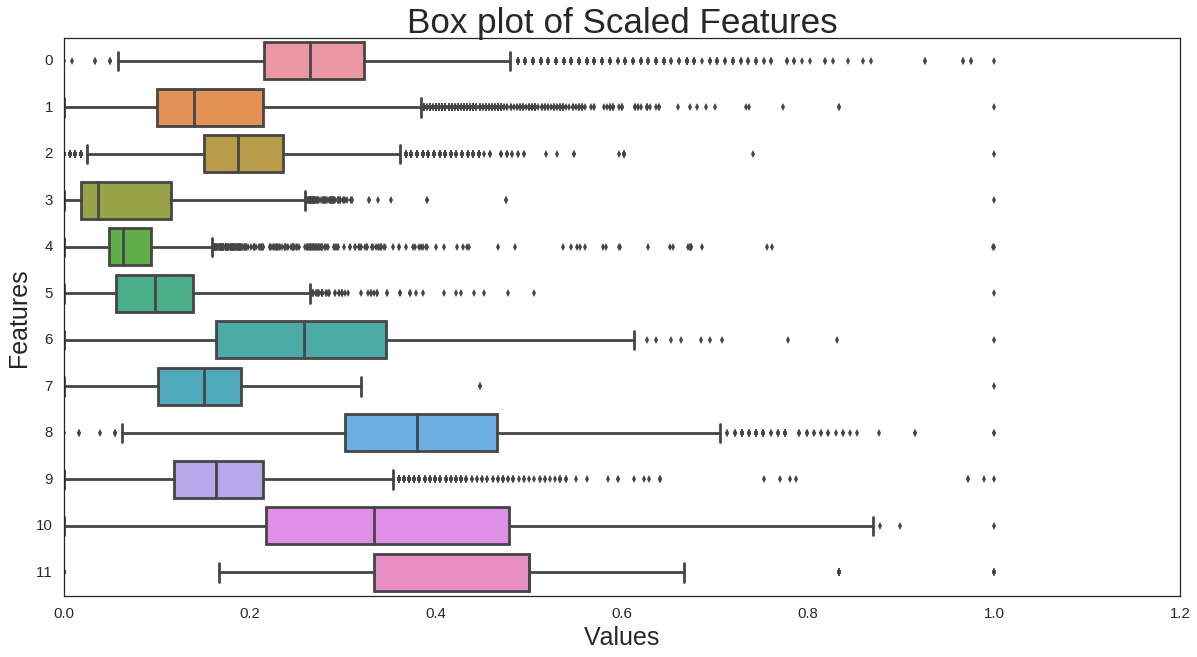

In [38]:
plt.figure(figsize=(20,10))
sns.boxplot(data=feat_scaled, orient="h")
plt.title('Box plot of Scaled Features',  fontsize = 35)
plt.ylabel('Features', fontsize=25)
plt.xlabel('Values', fontsize=25)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

In [39]:
from keras.utils.np_utils import to_categorical
target_exp = to_categorical(target)
target_exp

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [40]:
#split into training and test set
X_train, X_test, y_train, y_test = train_test_split(feat_scaled,target_exp,test_size=0.1, random_state=0)
#keras expects targets in the above expanded form but sklearn utilities such as roc_curve, confusion_matrix 
#expects a vector so I am generating a split of the data just for these plots
X00_train, X00_test, y00_train, y00_test = train_test_split(feat_scaled,target,test_size=0.1, random_state=0)


In [44]:
import time , timeit

# Multilayer Perceptron Classification

### Motivations for choice of parameters

**1: Activation Functions **

In our Multilayer Perceptron we use Rectified Linear Units (RELU) and Dropout to maximise learning and prevent overfitting. The superior performance of training with RELU over sigmoid is noted in the reference below.

**Refence**

[IMPROVING DEEP NEURAL NETWORKS FOR LVCSR USING RECTIFIED LINEAR UNITS AND DROPOUT](http://www.cs.toronto.edu/~fritz/absps/georgerectified.pdf)

**2: The Adam Optimizer**

>The Adam algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments. The method is straightforward to implement, is computationally efficient, has little memory requirements, is invariant to diagonal rescaling of the gradients, and is well suited for problems that are large in terms of data and/or parameters. The method is also appropriate for non-stationary objectives and problems with very noisy and/or sparse gradients. The hyper-parameters have intuitive interpretations and typically require little tuning. Some connections to related algorithms, on which Adam was inspired, are discussed. We also analyze the theoretical convergence properties of the algorithm and provide a regret bound on the convergence rate that is comparable to the best known results under the online convex optimization framework. 

**Reference:**

[Adam: A Method for Stochastic Optimization](http://arxiv.org/abs/1412.6980v8) 

**Parameterisation:**
Below are the parameters for the optimizer used in the model. Note that this is the default paramerisation and it is recommended to leave this unchanged. Since it gives very good performance there is no motivation to change this. These parameters are suggested by the paper.

>**keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)**

**References:**

[Keras Optimizers](http://keras.io/optimizers/)

**3. Dropout**

Georg et al. 2013 note the effectiveness of Dropout method on training neural networks and prevent overfitting. Here the idea is to destroy with probability p some portion of the data in the network. This forces the network to learn reducndant representations of the data.

**Refence**

[IMPROVING DEEP NEURAL NETWORKS FOR LVCSR USING RECTIFIED LINEAR UNITS AND DROPOUT](http://www.cs.toronto.edu/~fritz/absps/georgerectified.pdf)

# The long route to a perceptron

In [41]:
n_hiddens = [1024, 512,256, 128,64,32,16,8]
scores = []
start_time = time.time()
for n_hidden in n_hiddens:
    # Build a simple neural network.
    model = Sequential()
    model.add(Dense(input_dim = X_train.shape[1], output_dim = n_hidden))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_hidden))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim = 2))
    model.add(Activation('softmax'))
   
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    model.fit(X_train, y_train, nb_epoch = 10, batch_size = 10, show_accuracy = True, verbose = 1, 
              validation_split = 0.2)
    Y_cv_pred = to_categorical(model.predict_classes(X_test, batch_size = 10, verbose = 1))

    score = accuracy_score(y_test, Y_cv_pred)
    scores.append(score)
    print('Using [%d] number of hidden neurons yields. Accuracy score: %.4f' % (n_hidden, score))
    print('')
end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))


Train on 4677 samples, validate on 1170 samples
Epoch 1/10
4677/4677 [==============================] - 30s - loss: 0.0914 - acc: 0.9733 - val_loss: 0.0362 - val_acc: 0.9880
Epoch 2/10
4677/4677 [==============================] - 30s - loss: 0.0511 - acc: 0.9874 - val_loss: 0.0371 - val_acc: 0.9889
Epoch 3/10
4677/4677 [==============================] - 32s - loss: 0.0456 - acc: 0.9867 - val_loss: 0.0474 - val_acc: 0.9829
Epoch 4/10
4677/4677 [==============================] - 34s - loss: 0.0427 - acc: 0.9906 - val_loss: 0.0260 - val_acc: 0.9923
Epoch 5/10
4677/4677 [==============================] - 34s - loss: 0.0396 - acc: 0.9893 - val_loss: 0.0210 - val_acc: 0.9957
Epoch 6/10
4677/4677 [==============================] - 34s - loss: 0.0329 - acc: 0.9923 - val_loss: 0.0302 - val_acc: 0.9915
Epoch 7/10
4677/4677 [==============================] - 32s - loss: 0.0307 - acc: 0.9917 - val_loss: 0.0406 - val_acc: 0.9872
Epoch 8/10
4677/4677 [==============================] - 32s - loss: 0.

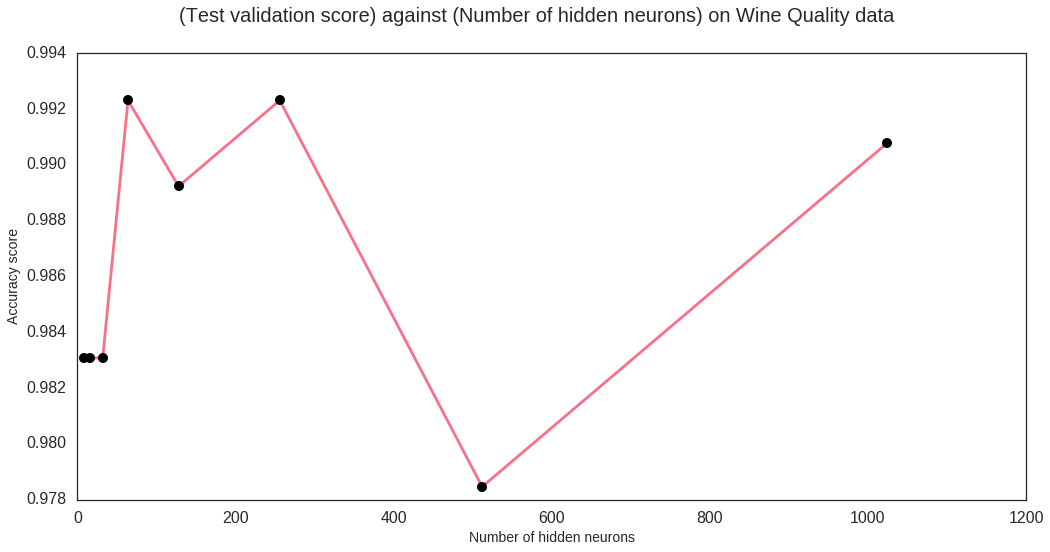

In [42]:
# Plot the results for comparison

fig = plt.figure()
fig.suptitle('(Test validation score) against (Number of hidden neurons) on Wine Quality data', fontsize = 20)
fig.set_figwidth(17)
fig.set_figheight(8)
ax = fig.add_subplot(111)
ax.plot(n_hiddens, scores, '-o', markersize = 10, markerfacecolor = 'k')
ax.set_xlabel('Number of hidden neurons', fontsize = 14)
ax.set_ylabel('Accuracy score', fontsize = 14)

#  The mimimum number of neurons to use are 16 reason being 8 is less than input dimension of input data. We want the model to be flexible not just small

## Test a standard perceptron with sigmoid activation and sgd backprop no dropout

In [64]:
start_time = time.time()
n_hidden=16
model = Sequential()
model.add(Dense(input_dim = X_train.shape[1], output_dim = n_hidden))
model.add(Activation('tanh'))
#model.add(Dropout(0.2))
model.add(Dense(n_hidden))
model.add(Activation('tanh'))
#model.add(Dropout(0.2))
model.add(Dense(output_dim = 2))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='sgd')
hist = model.fit(X_train, y_train, nb_epoch = 100, batch_size = 20, show_accuracy = True, verbose = 1,
                 validation_split = 0.2,
                 callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')])
score = model.evaluate(X_test, y_test,show_accuracy=True, verbose=2)
end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))
dt_t0 = end_time - start_time

Train on 4677 samples, validate on 1170 samples
Epoch 1/100
4677/4677 [==============================] - 1s - loss: 0.5794 - acc: 0.7370 - val_loss: 0.5029 - val_acc: 0.7863
Epoch 2/100
4677/4677 [==============================] - 0s - loss: 0.5281 - acc: 0.7430 - val_loss: 0.4667 - val_acc: 0.7872
Epoch 3/100
4677/4677 [==============================] - 0s - loss: 0.4849 - acc: 0.7490 - val_loss: 0.4181 - val_acc: 0.8068
Epoch 4/100
4677/4677 [==============================] - 0s - loss: 0.4197 - acc: 0.7956 - val_loss: 0.3453 - val_acc: 0.8692
Epoch 5/100
4677/4677 [==============================] - 1s - loss: 0.3366 - acc: 0.8777 - val_loss: 0.2658 - val_acc: 0.9359
Epoch 6/100
4677/4677 [==============================] - 1s - loss: 0.2555 - acc: 0.9363 - val_loss: 0.2000 - val_acc: 0.9675
Epoch 7/100
4677/4677 [==============================] - 0s - loss: 0.1936 - acc: 0.9613 - val_loss: 0.1498 - val_acc: 0.9744
Epoch 8/100
4677/4677 [==============================] - 0s - loss: 0.

In [66]:
print('Test score:', score[0])
print('Test accuracy:', (score[1]*100))

Test score: 0.0668972942548
Test accuracy: 98.1538461538


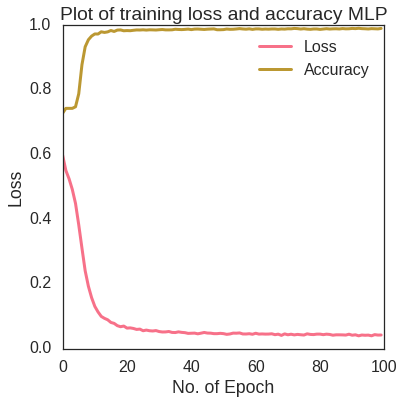

In [67]:
plt.figure(figsize=(6,6))
plt.plot(hist.history['loss'], label='Loss', linewidth=3)
plt.plot(hist.history['acc'],label='Accuracy', linewidth=3)
plt.title('Plot of training loss and accuracy MLP')
plt.xlabel('No. of Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()

# Do the same thing with Dropout

In [65]:
start_time = time.time()
n_hidden=16
model = Sequential()
model.add(Dense(input_dim = X_train.shape[1], output_dim = n_hidden))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(n_hidden))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(output_dim = 2))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='sgd')
hist = model.fit(X_train, y_train, nb_epoch = 100, batch_size = 20, show_accuracy = True, verbose = 1,
                 validation_split = 0.2,
                 callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')])
score = model.evaluate(X_test, y_test,show_accuracy=True, verbose=2)
end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))
dt_t1 = end_time - start_time

Train on 4677 samples, validate on 1170 samples
Epoch 1/100
4677/4677 [==============================] - 1s - loss: 0.5977 - acc: 0.7278 - val_loss: 0.5217 - val_acc: 0.7863
Epoch 2/100
4677/4677 [==============================] - 1s - loss: 0.5507 - acc: 0.7428 - val_loss: 0.4884 - val_acc: 0.7863
Epoch 3/100
4677/4677 [==============================] - 1s - loss: 0.5248 - acc: 0.7428 - val_loss: 0.4598 - val_acc: 0.7863
Epoch 4/100
4677/4677 [==============================] - 1s - loss: 0.4921 - acc: 0.7428 - val_loss: 0.4213 - val_acc: 0.7863
Epoch 5/100
4677/4677 [==============================] - 1s - loss: 0.4488 - acc: 0.7477 - val_loss: 0.3676 - val_acc: 0.7940
Epoch 6/100
4677/4677 [==============================] - 1s - loss: 0.3827 - acc: 0.7877 - val_loss: 0.3015 - val_acc: 0.8838
Epoch 7/100
4677/4677 [==============================] - 1s - loss: 0.3105 - acc: 0.8777 - val_loss: 0.2308 - val_acc: 0.9368
Epoch 8/100
4677/4677 [==============================] - 1s - loss: 0.

In [47]:
print('Test score:', score[0])
print('Test accuracy:', (score[1]*100))

Test score: 0.0637488194985
Test accuracy: 98.4615384615


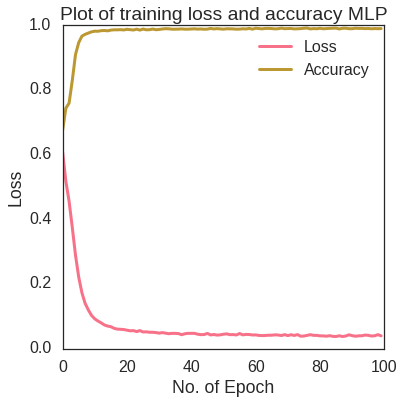

In [48]:
plt.figure(figsize=(6,6))
plt.plot(hist.history['loss'], label='Loss', linewidth=3)
plt.plot(hist.history['acc'],label='Accuracy', linewidth=3)
plt.title('Plot of training loss and accuracy MLP')
plt.xlabel('No. of Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()

# This architecture does not converge with Dropout.
# Do we need another layer?

In [49]:
start_time = time.time()
n_hidden=16
model = Sequential()
model.add(Dense(input_dim = X_train.shape[1], output_dim = n_hidden))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(n_hidden))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(n_hidden))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(output_dim = 2))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='sgd')
hist = model.fit(X_train, y_train, nb_epoch = 100, batch_size = 20, show_accuracy = True, verbose = 1,
                 validation_split = 0.2,
                 callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')])
score = model.evaluate(X_test, y_test,show_accuracy=True, verbose=2)
end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))
dt_t2 = end_time - start_time

Train on 4677 samples, validate on 1170 samples
Epoch 1/100
4677/4677 [==============================] - 4s - loss: 0.5951 - acc: 0.7248 - val_loss: 0.5038 - val_acc: 0.7863
Epoch 2/100
4677/4677 [==============================] - 1s - loss: 0.5350 - acc: 0.7432 - val_loss: 0.4619 - val_acc: 0.7863
Epoch 3/100
4677/4677 [==============================] - 1s - loss: 0.4859 - acc: 0.7464 - val_loss: 0.3927 - val_acc: 0.7863
Epoch 4/100
4677/4677 [==============================] - 1s - loss: 0.4060 - acc: 0.7851 - val_loss: 0.2896 - val_acc: 0.8769
Epoch 5/100
4677/4677 [==============================] - 1s - loss: 0.2966 - acc: 0.8837 - val_loss: 0.1845 - val_acc: 0.9675
Epoch 6/100
4677/4677 [==============================] - 1s - loss: 0.2014 - acc: 0.9438 - val_loss: 0.1234 - val_acc: 0.9803
Epoch 7/100
4677/4677 [==============================] - 1s - loss: 0.1424 - acc: 0.9699 - val_loss: 0.0895 - val_acc: 0.9812
Epoch 8/100
4677/4677 [==============================] - 1s - loss: 0.

In [50]:
print('Test score:', score[0])
print('Test accuracy:', (score[1]*100))

Test score: 0.058428234723
Test accuracy: 98.4615384615


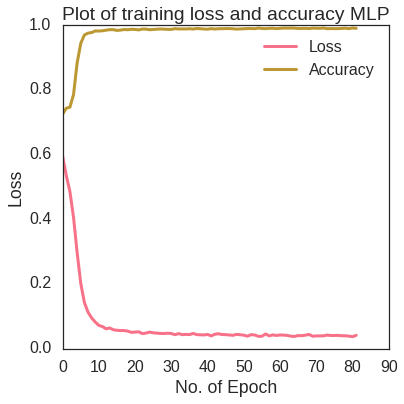

In [51]:
plt.figure(figsize=(6,6))
plt.plot(hist.history['loss'], label='Loss', linewidth=3)
plt.plot(hist.history['acc'],label='Accuracy', linewidth=3)
plt.title('Plot of training loss and accuracy MLP')
plt.xlabel('No. of Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()

# Atleast we have convergence with an extra layer. The traditional set up is slow to converge in training, so lets test with RELU.

# How does this compare with RELU + Dropout + SGD. We evaluate with a single hidden layer first. 

In [55]:
start_time = time.time()
n_hidden=16
model = Sequential()
model.add(Dense(input_dim = X_train.shape[1], output_dim = n_hidden))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(n_hidden))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim = 2))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='sgd')
hist = model.fit(X_train, y_train, nb_epoch = 100, batch_size = 20, show_accuracy = True, verbose = 1,
                 validation_split = 0.2,
                 callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')])
score = model.evaluate(X_test, y_test,show_accuracy=True, verbose=2)

end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))
dt_t3 = end_time - start_time


Train on 4677 samples, validate on 1170 samples
Epoch 1/100
4677/4677 [==============================] - 2s - loss: 0.6496 - acc: 0.7064 - val_loss: 0.5853 - val_acc: 0.7863
Epoch 2/100
4677/4677 [==============================] - 1s - loss: 0.5833 - acc: 0.7428 - val_loss: 0.5237 - val_acc: 0.7863
Epoch 3/100
4677/4677 [==============================] - 1s - loss: 0.5549 - acc: 0.7428 - val_loss: 0.4954 - val_acc: 0.7863
Epoch 4/100
4677/4677 [==============================] - 1s - loss: 0.5383 - acc: 0.7428 - val_loss: 0.4751 - val_acc: 0.7863
Epoch 5/100
4677/4677 [==============================] - 1s - loss: 0.5183 - acc: 0.7428 - val_loss: 0.4494 - val_acc: 0.7863
Epoch 6/100
4677/4677 [==============================] - 1s - loss: 0.4909 - acc: 0.7428 - val_loss: 0.4156 - val_acc: 0.7863
Epoch 7/100
4677/4677 [==============================] - 1s - loss: 0.4540 - acc: 0.7428 - val_loss: 0.3711 - val_acc: 0.7863
Epoch 8/100
4677/4677 [==============================] - 1s - loss: 0.

In [56]:
print('Test score:', score[0])
print('Test accuracy:', (score[1]*100))

Test score: 0.0667831821697
Test accuracy: 98.4615384615


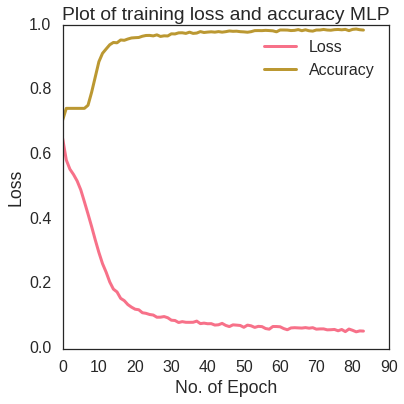

In [57]:
plt.figure(figsize=(6,6))
plt.plot(hist.history['loss'], label='Loss', linewidth=3)
plt.plot(hist.history['acc'],label='Accuracy', linewidth=3)
plt.title('Plot of training loss and accuracy MLP')
plt.xlabel('No. of Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()

# Dropout causes networks to take longer in training which is suggested in literature. So we will try the Adam optimizer to see if we can make things go faster.

In [58]:
start_time = time.time()
n_hidden=16
model = Sequential()
model.add(Dense(input_dim = X_train.shape[1], output_dim = n_hidden))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(n_hidden))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim = 2))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
hist = model.fit(X_train, y_train, nb_epoch = 100, batch_size = 20, show_accuracy = True, verbose = 1,
                 validation_split = 0.2,
                 callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')])
score = model.evaluate(X_test, y_test,show_accuracy=True, verbose=2)

end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))
dt_t4 = end_time - start_time


Train on 4677 samples, validate on 1170 samples
Epoch 1/100
4677/4677 [==============================] - 3s - loss: 0.5646 - acc: 0.7169 - val_loss: 0.3236 - val_acc: 0.8923
Epoch 2/100
4677/4677 [==============================] - 1s - loss: 0.2333 - acc: 0.9237 - val_loss: 0.1005 - val_acc: 0.9726
Epoch 3/100
4677/4677 [==============================] - 1s - loss: 0.1228 - acc: 0.9587 - val_loss: 0.0636 - val_acc: 0.9821
Epoch 4/100
4677/4677 [==============================] - 1s - loss: 0.0994 - acc: 0.9699 - val_loss: 0.0534 - val_acc: 0.9838
Epoch 5/100
4677/4677 [==============================] - 1s - loss: 0.0783 - acc: 0.9780 - val_loss: 0.0471 - val_acc: 0.9863
Epoch 6/100
4677/4677 [==============================] - 1s - loss: 0.0716 - acc: 0.9801 - val_loss: 0.0442 - val_acc: 0.9846
Epoch 7/100
4677/4677 [==============================] - 1s - loss: 0.0652 - acc: 0.9827 - val_loss: 0.0413 - val_acc: 0.9880
Epoch 8/100
4677/4677 [==============================] - 1s - loss: 0.

In [59]:
print('Test score:', score[0])
print('Test accuracy:', (score[1]*100))

Test score: 0.0450770897519
Test accuracy: 99.2307692308


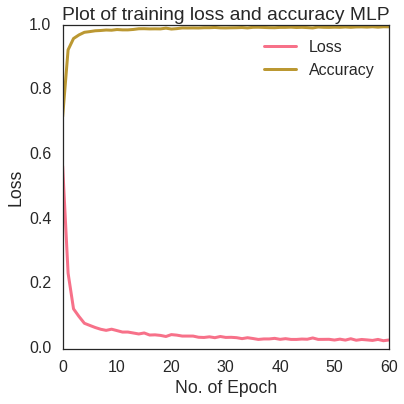

In [60]:
plt.figure(figsize=(6,6))
plt.plot(hist.history['loss'], label='Loss', linewidth=3)
plt.plot(hist.history['acc'],label='Accuracy', linewidth=3)
plt.title('Plot of training loss and accuracy MLP')
plt.xlabel('No. of Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()

# Finally things are getting faster. So we ditch the SGD and Tanh activation functions. We try a softmax at the output layer to see if it makes a difference.

In [130]:
start_time = time.time()
n_hidden=16
model = Sequential()
model.add(Dense(input_dim = X_train.shape[1], output_dim = n_hidden))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(n_hidden))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim = 2))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
hist = model.fit(X_train, y_train, nb_epoch = 100, batch_size = 20, show_accuracy = True, verbose = 1,
                 validation_split = 0.2,
                 callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')])
score = model.evaluate(X_test, y_test,show_accuracy=True, verbose=2)

end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))
dt_t5 = end_time - start_time


Train on 4677 samples, validate on 1170 samples
Epoch 1/100
4677/4677 [==============================] - 12s - loss: 0.5387 - acc: 0.7443 - val_loss: 0.3443 - val_acc: 0.7915
Epoch 2/100
4677/4677 [==============================] - 1s - loss: 0.2503 - acc: 0.9042 - val_loss: 0.0966 - val_acc: 0.9778
Epoch 3/100
4677/4677 [==============================] - 1s - loss: 0.1214 - acc: 0.9637 - val_loss: 0.0619 - val_acc: 0.9786
Epoch 4/100
4677/4677 [==============================] - 1s - loss: 0.0872 - acc: 0.9746 - val_loss: 0.0542 - val_acc: 0.9829
Epoch 5/100
4677/4677 [==============================] - 1s - loss: 0.0738 - acc: 0.9786 - val_loss: 0.0472 - val_acc: 0.9838
Epoch 6/100
4677/4677 [==============================] - 1s - loss: 0.0652 - acc: 0.9812 - val_loss: 0.0415 - val_acc: 0.9863
Epoch 7/100
4677/4677 [==============================] - 1s - loss: 0.0670 - acc: 0.9801 - val_loss: 0.0395 - val_acc: 0.9863
Epoch 8/100
4677/4677 [==============================] - 1s - loss: 0

In [131]:
print('Test score:', score[0])
print('Test accuracy:', (score[1]*100))

Test score: 0.0461687243673
Test accuracy: 99.0769230769


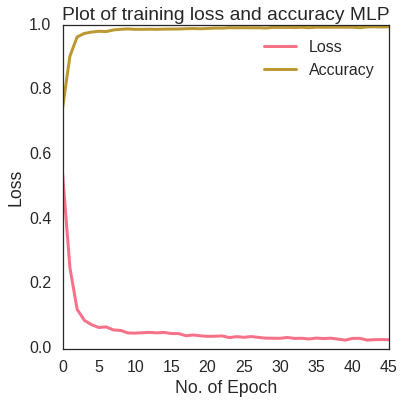

In [145]:
plt.figure(figsize=(6,6))
plt.plot(hist.history['loss'], label='Loss', linewidth=3)
plt.plot(hist.history['acc'],label='Accuracy', linewidth=3)
plt.title('Plot of training loss and accuracy MLP')
plt.xlabel('No. of Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()

# This is the best performing network so far. We visualise the run times from the different test runs

In [133]:
Test_Type = ['Tanh + Sig + SGD',
             'Tanh + Sig + SGD + DO',
             'Tanh + Sig + SGD + DO + 2 HL',
             'RELU + Sig + SGD + DO',
             'RELU + Sig + Adam + DO',
             'RELU + Softmax + Adam + DO' ]
Test_Type

['Tanh + Sig + SGD',
 'Tanh + Sig + SGD + DO',
 'Tanh + Sig + SGD + DO + 2 HL',
 'RELU + Sig + SGD + DO',
 'RELU + Sig + Adam + DO',
 'RELU + Softmax + Adam + DO']

In [134]:
testTime= [dt_t0, dt_t1, dt_t2, dt_t3,dt_t4, dt_t5]
testTime

[107.0653223991394,
 114.24149799346924,
 129.2318994998932,
 144.62802743911743,
 99.56096339225769,
 126.92157554626465]

In [135]:
test_df = pd.Series(testTime, index=Test_Type)

In [136]:
test_df

Tanh + Sig + SGD                107.065322
Tanh + Sig + SGD + DO           114.241498
Tanh + Sig + SGD + DO + 2 HL    129.231899
RELU + Sig + SGD + DO           144.628027
RELU + Sig + Adam + DO           99.560963
RELU + Softmax + Adam + DO      126.921576
dtype: float64

In [137]:
print("Mean of Runtimes %g"%test_df.mean())
print("Std Dev of Runtimes %g"%test_df.std())

Mean of Runtimes 120.275
Std Dev of Runtimes 16.4769


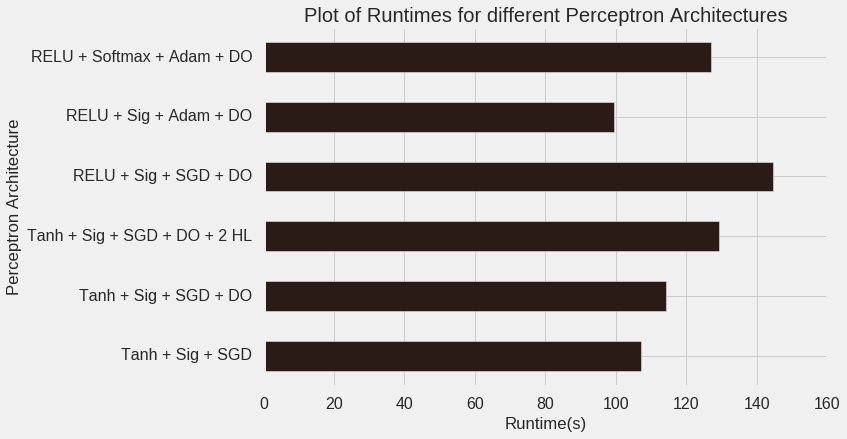

In [138]:
test_df.plot(kind='barh', figsize=(9,6), color= '#2B1B17')
plt.title('Plot of Runtimes for different Perceptron Architectures')
plt.ylabel('Perceptron Architecture')
plt.xlabel('Runtime(s)')

In [139]:
y_pred = to_categorical(model.predict_classes(X_test))
print('Classification Report \n',classification_report(y_test,y_pred))

650/650 [==============================] - 0s     
Classification Report 
              precision    recall  f1-score   support

          0       0.99      0.97      0.98       146
          1       0.99      1.00      0.99       504

avg / total       0.99      0.99      0.99       650



In [140]:
print('ROC AUC Score: ',(roc_auc_score(y_test,y_pred)*100))

ROC AUC Score:  98.4317242879


650/650 [==============================] - 0s     


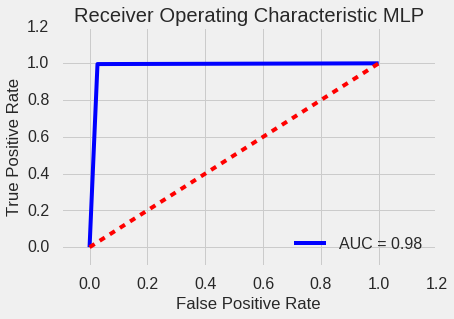

In [141]:
y_pred = model.predict_classes(X_test)

#Plot ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y00_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic MLP')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix MLP
 [[142   4]
 [  2 502]]

Normalized confusion matrix MLP
[[ 0.97260274  0.02739726]
 [ 0.00396825  0.99603175]]


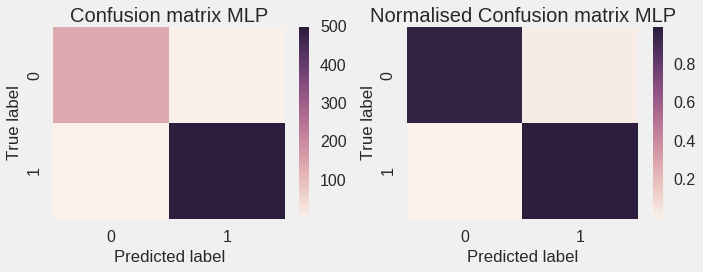

In [142]:
#Calculate Confusion Matrix
cm = confusion_matrix(y00_test,y_pred)
print('Confusion Matrix MLP\n',cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('\nNormalized confusion matrix MLP')
print(cm_normalized)
# Show confusion matrix
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.heatmap(cm)
plt.title('Confusion matrix MLP')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.subplot(122)
sns.heatmap(cm_normalized)
plt.title('Normalised Confusion matrix MLP')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# SVM Classification

In [51]:
#SVM Importts
from sklearn.grid_search import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import *
from sklearn.pipeline import *

In [52]:
#split into training and test set for svm
X2_train, X2_test, y2_train, y2_test = train_test_split(feat_scaled,target,test_size=0.1, random_state=0)

**Grid Search for SVM Classifier Parameters**

In [53]:
C_range = [0.0001, 0.1, 1.0, 10.0]
kernel = ['linear','rbf','poly']
gamma=[0.0001, 0.1, 1.0, 10.0]
param_grid = dict(C=C_range, kernel=kernel, gamma=gamma)
cv = StratifiedShuffleSplit(y2_train ,n_iter=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X2_train, y2_train)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[1 0 ..., 1 1], n_iter=5, test_size=0.2, random_state=42),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.1, 1.0, 10.0], 'gamma': [0.0001, 0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [56]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 10.0, 'kernel': 'rbf'} with a score of 1.00


In [57]:
clf = SVC(kernel='rbf', probability=True, C=10, gamma=10, random_state=42)
clf.fit(X2_train, y2_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [120]:
#Indexing column names
z = feat.columns

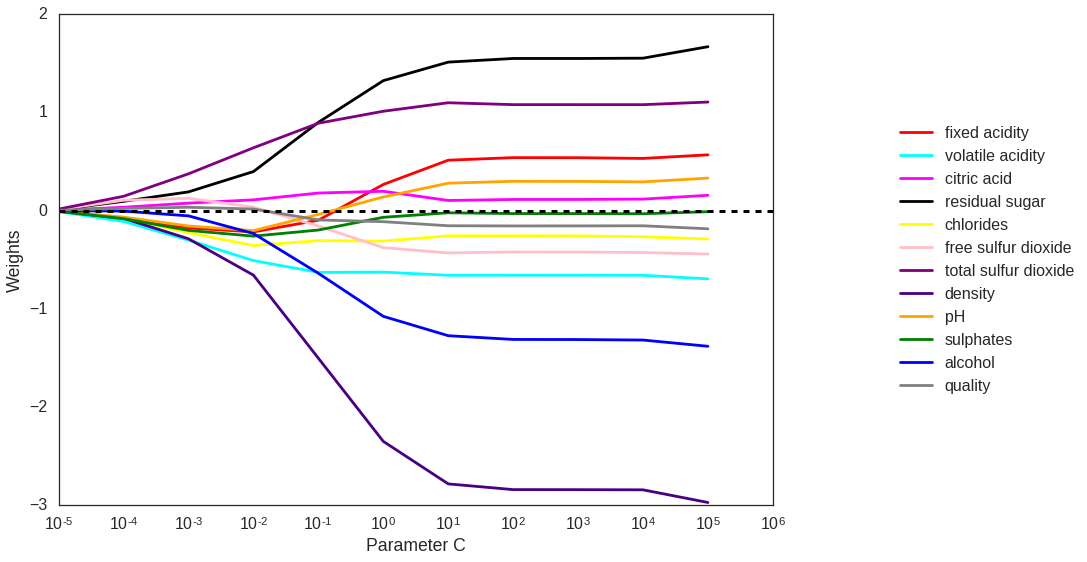

In [121]:
#Visualizing how the features are affected by the changes in C regularization parameter. 
#We will use the primal weights, which live in feature space, in order to inspect them 
#as to their "importance" for classification.
#This is only possible with a linear kernel.

colors = ['red', 'cyan', 'magenta', 'black', 'yellow', 'pink', 
          'purple', 'indigo', 'orange', 'green', 'blue', 'gray']
weights, params = [], []
for c in np.arange(-5,6):
    clf_lin = SVC(kernel = 'linear', C = 10**c, random_state = 4)
    clf_lin.fit(X2_train, y2_train)
    weights.append(clf_lin.coef_[0])
    params.append(10**c)
    
weights = np.array(weights)

for col, color in zip(range(weights.shape[0] + 1), colors):   
    plt.plot(params, weights[:, col], label = z[col], color = color)
plt.figure(figsize=(8,6))
plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
plt.xlim([10 ** (-5), 10**6])
plt.ylabel('Weights')
plt.xlabel('Parameter C')
plt.xscale('log')
plt.legend(loc = 'center', bbox_to_anchor = (1.3, 0.5))
plt.show()

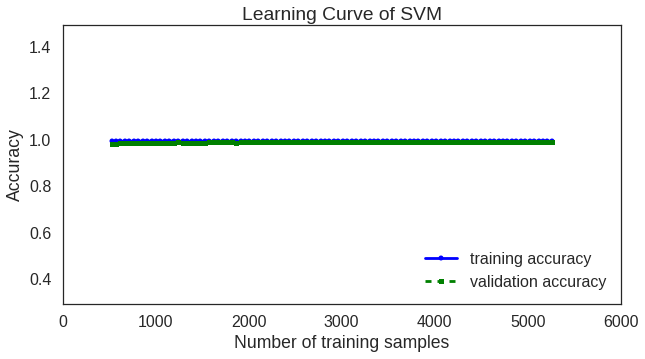

In [58]:
#Learning curve of the SVC with the optimal hyperparameters 
from sklearn.learning_curve import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator = SVC(kernel='rbf', probability=True, degree = 3, 
                                                                        C=10, gamma = 10.0, random_state = 42), 
                                                       X=X2_train, y = y2_train, 
                                                       train_sizes = np.linspace(0.1, 1.0, 100),
                                                       cv = 10, n_jobs = 1)
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, 
        label = 'validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')
plt.title('Learning Curve of SVM')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.3, 1.5])
plt.show()

In [59]:
clf.score(X2_test, y2_test)

0.99692307692307691

In [60]:
y2_pred = clf.predict(X2_test)
print('Classification Report \n',classification_report(y2_test,y2_pred))

Classification Report 
              precision    recall  f1-score   support

          0       1.00      0.99      0.99       137
          1       1.00      1.00      1.00       513

avg / total       1.00      1.00      1.00       650



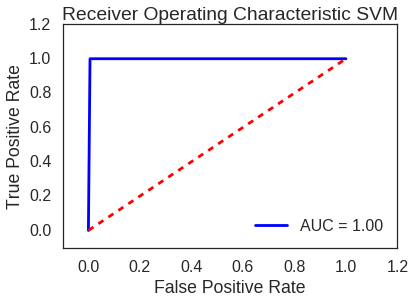

In [71]:
#Plot ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_test, y2_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic SVM')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix SVM
 [[159   1]
 [  0 490]]

Normalized confusion matrix SVM
[[ 0.99375  0.00625]
 [ 0.       1.     ]]


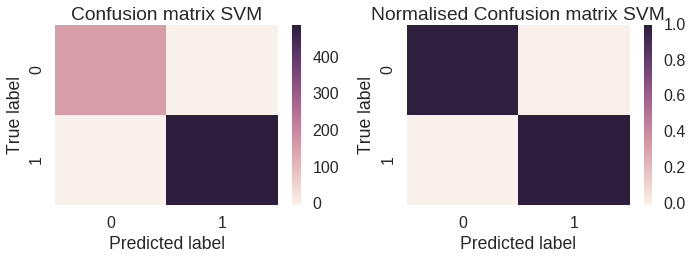

In [72]:
#Calculate Confusion Matrix
cm = confusion_matrix(y2_test,y2_pred)
print('Confusion Matrix SVM\n',cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('\nNormalized confusion matrix SVM')
print(cm_normalized)
# Show confusion matrix
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.heatmap(cm)
plt.title('Confusion matrix SVM')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.subplot(122)
sns.heatmap(cm_normalized)
plt.title('Normalised Confusion matrix SVM')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## 4: Further Training

The papers below discuss data augmentation as a way of generating additional data from existing data through affine transformations such as adding translations, rotations and skew to existing data. In our data, we will take the initial dataset and apply some common standardization methods such as z-score normalisation to generate new data for our models.

Also, we test our models by oversampling our current dataset for the red wine and observe the results. 


**References:**

1. [ImageNet Classification with Deep Convolutional Neural Networks](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)
2. [Best Practices for Convolutional Neural Networks Applied to Visual Document Analysis](http://131.107.65.14/pubs/68920/icdar03.pdf)

**Processing Steps**
    + Oversample red wine data by 3
    + Standardize data
    + Add random noise to data
    + Split into training and test set 
    + Train and test models as before
    + Evaluate using same metrics as before

In [85]:
#join both datasets together
data =  pd.concat([red,white, red, red,red])
print('Data after merging \n',data.head())
print('Total Samples: ', data.shape[0])
print('Total Columns: ', data.shape[1])

Data after merging 
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11                    34   0.9978  3.51       0.56   
1                   25                    67   0.9968  3.20       0.68   
2                   15                    54   0.9970  3.26       0.65   
3                   17                    60   0.9980  3.16       0.58   
4                   11                    34   0.9978  3.51       0.56   

   alcohol  quality  Color  
0      9.4        5      0  
1      

In [86]:
#Shuffle df
data = data.iloc[np.random.permutation(len(data))]

In [87]:
#Reset index 
data.reset_index(level = 0, inplace = True)

In [88]:
#Drop old index (not needed column)
data = data.drop('index', axis = 1)

In [89]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Color
0,7.5,0.42,0.31,1.6,0.080,15,42,0.99780,3.31,0.64,9.0,5,0
1,6.4,0.14,0.31,1.2,0.034,53,138,0.99084,3.38,0.35,11.5,7,1
2,6.4,0.22,0.32,7.9,0.029,34,124,0.99480,3.40,0.39,10.2,5,1
3,6.8,0.26,0.34,15.1,0.060,42,162,0.99705,3.24,0.52,10.5,3,1
4,6.4,0.69,0.09,7.6,0.044,34,144,0.99480,3.26,0.38,10.1,6,1


In [90]:
feat = data[colnames[:-1]]
feat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.42,0.31,1.6,0.080,15,42,0.99780,3.31,0.64,9.0,5
1,6.4,0.14,0.31,1.2,0.034,53,138,0.99084,3.38,0.35,11.5,7
2,6.4,0.22,0.32,7.9,0.029,34,124,0.99480,3.40,0.39,10.2,5
3,6.8,0.26,0.34,15.1,0.060,42,162,0.99705,3.24,0.52,10.5,3
4,6.4,0.69,0.09,7.6,0.044,34,144,0.99480,3.26,0.38,10.1,6


In [91]:
feat_std = StandardScaler().fit_transform(feat)
feat_std[1:5]

array([[-0.80406829, -1.43707147,  0.06839527, -0.75417334, -0.81443565,
         1.71471587,  0.87738548, -1.70242848,  0.7423244 , -1.38410814,
         0.90938608,  1.48017476],
       [-0.80406829, -1.02586652,  0.12731192,  0.92476819, -0.9295192 ,
         0.57943024,  0.63970348, -0.27634587,  0.86385446, -1.14867494,
        -0.23016392, -0.87103392],
       [-0.55364973, -0.82026404,  0.24514521,  2.72900386, -0.21600123,
         1.05744524,  1.28484033,  0.53392834, -0.108386  , -0.38351702,
         0.03280915, -3.2222426 ],
       [-0.80406829,  1.38996258, -1.22777098,  0.8495917 , -0.58426857,
         0.57943024,  0.97924919, -0.27634587,  0.01314406, -1.20753324,
        -0.31782161,  0.30457042]])

In [92]:
noise = np.random.random_sample((feat.shape[0],feat.shape[1]))*0.05

In [93]:
feat_std_noise = feat_std + noise
feat_std_noise[1:5]

array([[-0.77144021, -1.40136284,  0.07601604, -0.71117569, -0.80711161,
         1.72185208,  0.88370218, -1.69262288,  0.77779978, -1.35246746,
         0.9526325 ,  1.51842606],
       [-0.75746642, -0.98258481,  0.15536124,  0.9403996 , -0.91491772,
         0.58128036,  0.67581661, -0.24986396,  0.886388  , -1.11879704,
        -0.22393211, -0.8684679 ],
       [-0.53052615, -0.79958316,  0.29373318,  2.75907024, -0.19201797,
         1.08600241,  1.30128161,  0.54234678, -0.09105326, -0.34639855,
         0.06891731, -3.21713095],
       [-0.7676544 ,  1.41175973, -1.21396266,  0.88050531, -0.54686454,
         0.62868522,  1.0053073 , -0.24372988,  0.02021846, -1.18297901,
        -0.29091819,  0.33924985]])

In [94]:
target = data[colnames[12]]
target.head()

0    0
1    1
2    1
3    1
4    1
Name: Color, dtype: int64

In [95]:
target_exp = to_categorical(target)

### In this section we do the following:
+ Split the new data into training and test set but we run it a few times with different splits such as we increase the size of the test set from 10,60,80 percent of the data with the remaining being for training to get an idea of how robust the models are

In [97]:
#split into training and test set
X_train, X_test, y_train, y_test = train_test_split(feat_std_noise,target_exp,test_size=0.8, random_state=0)
X00_train, X00_test, y00_train, y00_test = train_test_split(feat_std_noise,target,test_size=0.8, random_state=0)

# 4.1: Multilayer Perceptron - additional training

In [98]:
hist = model.fit(X_train, y_train, nb_epoch = 100, batch_size = 20, show_accuracy = True, verbose = 1,
                 validation_split = 0.2,
                 callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')])
score = model.evaluate(X_test, y_test,show_accuracy=True, verbose=2)


Train on 1806 samples, validate on 452 samples
Epoch 1/100
1806/1806 [==============================] - 0s - loss: 0.3111 - acc: 0.9657 - val_loss: 0.1313 - val_acc: 0.9867
Epoch 2/100
1806/1806 [==============================] - 0s - loss: 0.1402 - acc: 0.9817 - val_loss: 0.1147 - val_acc: 0.9867
Epoch 3/100
1806/1806 [==============================] - 0s - loss: 0.1145 - acc: 0.9850 - val_loss: 0.1122 - val_acc: 0.9934
Epoch 4/100
1806/1806 [==============================] - 0s - loss: 0.0960 - acc: 0.9884 - val_loss: 0.1073 - val_acc: 0.9934
Epoch 5/100
1806/1806 [==============================] - 0s - loss: 0.1041 - acc: 0.9867 - val_loss: 0.1058 - val_acc: 0.9912
Epoch 6/100
1806/1806 [==============================] - 0s - loss: 0.0822 - acc: 0.9895 - val_loss: 0.0912 - val_acc: 0.9934
Epoch 7/100
1806/1806 [==============================] - 0s - loss: 0.0533 - acc: 0.9889 - val_loss: 0.0867 - val_acc: 0.9934
Epoch 8/100
1806/1806 [==============================] - 0s - loss: 0.0

In [99]:
print('Test score:', score[0])
print('Test accuracy:', (score[1]*100))

Test score: 0.0392641011126
Test accuracy: 99.3359893758


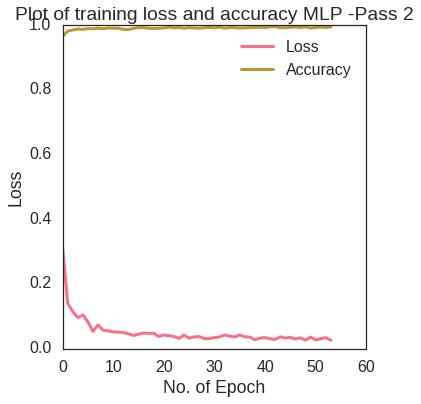

In [100]:
plt.figure(figsize=(6,6))
plt.plot(hist.history['loss'], label='Loss', linewidth=3)
plt.plot(hist.history['acc'],label='Accuracy', linewidth=3)
plt.title('Plot of training loss and accuracy MLP -Pass 2')
plt.xlabel('No. of Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()

In [101]:
y_pred = to_categorical(model.predict_classes(X_test))
print(classification_report(y_test,y_pred))

9036/9036 [==============================] - 0s     
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      5110
          1       0.99      1.00      0.99      3926

avg / total       0.99      0.99      0.99      9036



In [102]:
print('ROC AUC Score: ',(roc_auc_score(y_test,y_pred)*100))

ROC AUC Score:  99.368652757


9036/9036 [==============================] - 0s     


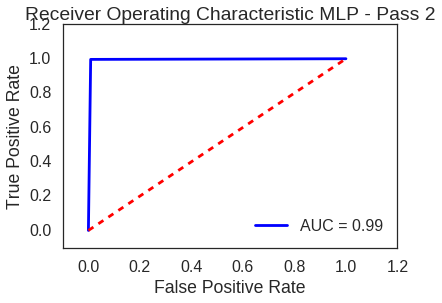

In [103]:
y_pred = model.predict_classes(X_test)

#Plot ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y00_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic MLP - Pass 2')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix MLP Pass 2
 [[5065   45]
 [  15 3911]]

Normalized confusion matrix MLP Pass 2
[[ 0.99119374  0.00880626]
 [ 0.00382068  0.99617932]]


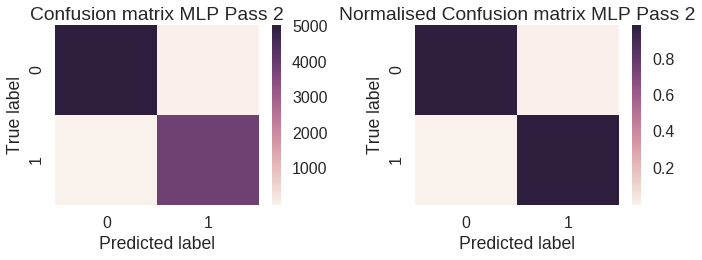

In [104]:
#Calculate Confusion Matrix
cm = confusion_matrix(y00_test,y_pred)
print('Confusion Matrix MLP Pass 2\n',cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('\nNormalized confusion matrix MLP Pass 2')
print(cm_normalized)
# Show confusion matrix
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.heatmap(cm)
plt.title('Confusion matrix MLP Pass 2')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.subplot(122)
sns.heatmap(cm_normalized)
plt.title('Normalised Confusion matrix MLP Pass 2')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# 4.2: SVM ClassifIer - additional training

In [106]:
#split into training and test set for svm
X2_train, X2_test, y2_train, y2_test = train_test_split(feat_std_noise,target,test_size=0.8, random_state=0)

In [107]:
clf.fit(X2_train, y2_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [108]:
clf.score(X2_test, y2_test)

0.78154050464807434

In [109]:
y2_pred = clf.predict(X2_test)
y2_pred

array([1, 1, 0, ..., 1, 1, 1])

In [110]:
print(classification_report(y2_test,y2_pred))

             precision    recall  f1-score   support

          0       1.00      0.61      0.76      5110
          1       0.67      1.00      0.80      3926

avg / total       0.85      0.78      0.78      9036



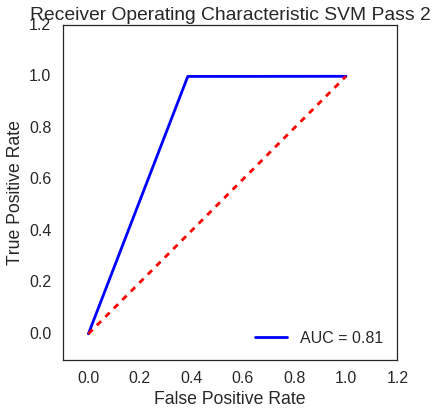

In [111]:
#Plot ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_test, y2_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic SVM Pass 2')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix SVM Pass 2
 [[3138 1972]
 [   2 3924]]

Normalized confusion matrix SVM Pass 2
[[  6.14090020e-01   3.85909980e-01]
 [  5.09424350e-04   9.99490576e-01]]


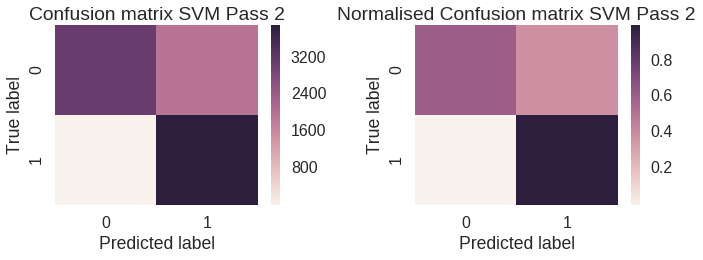

In [112]:
#Calculate Confusion Matrix
cm = confusion_matrix(y2_test,y2_pred)
print('Confusion Matrix SVM Pass 2\n',cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('\nNormalized confusion matrix SVM Pass 2')
print(cm_normalized)
# Show confusion matrix
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.heatmap(cm)
plt.title('Confusion matrix SVM Pass 2')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.subplot(122)
sns.heatmap(cm_normalized)
plt.title('Normalised Confusion matrix SVM Pass 2')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Observations

We see that both our models are robust in this case both to new data and to noisy data.